## **<span style="color:#f22a51">INTRODUCTION</span>**
Bellabeat is a high-tech manufacturer of health-focused products for women such as `Bellabeat app`, `Leaf`, `Time`, `Spring`, and `Bellabeat membership`. It was founded in 2013 by `Urška Sršen` and `Sando Mur`. The company is quite successful, with lots of potential to become a larger player in the global smart device industry. The founders are of the view that analyzing smart device fitness data could help unlock new growth opportunities for the company.

In this case study, I will follow the six steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act**, to break down how I analyzed the FitBit fitness Tracker Data in order to gain some insights that could be beneficial to Bellabeat.

## **<span style="color:#f22a51">1. ASK</span>**

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">1.1. KEY STAKEHOLDERS</h4>

1.	**Urška Sršen**: Cofounder and Chief Creative Officer at Bellabeat.
2.	**Sando Mur**: Cofounder and key member of the Bellabeat executive team. 
3.	**Marketing analytics team at Bellabeat**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.
4.	**Customers**: Everyone who purchases their product or use Bellabeat’s services. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">1.2. BUSINESS TASK</h4>

1.	To analyze FitBit Fitness Tracker Data from thirty eligible FitBit users, in order to gain some insights that could unlock new growth opportunities for the company. 
2.	To focus on one of Bellabeat’s products and analyze smart device data to gain insight into how customers are using their smart devices. <br>For this case study, I will focus on the **Bellabeat membership program**. This is a subscription-based membership program that gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## **<span style="color:#f22a51">2: PREPARE</span>**

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">2.1. DATA SOURCE</h4>

1.	The data is a free to use **FitBit Fitness tracker dataset made available through Mobius. It contains personal fitness tracker data from over thirty FitBit users who have given consent to use their data. 
2.	There are 18 csv files in all, but the datasets I find relevant to the product I want to focus on are daily activity, hourly calories, hourly steps, and sleep day dataset. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">2.2. SORTING THE DATA</h4>

1.	To have a quick overview of the data I have chosen, I opened each of them in Google sheets. The first thing I noticed was that the data was organized in a long format. I also noticed that the dailyActivity_merged data contains some metrics that can give us some insights like the total steps taken by the Fitbit users, the active minutes spent, and the calories burned. With that we can establish some correlation between calories burned and the steps taken. The hourly calories and the hourly steps contain info about the activity hour that will help give some insight about calories and the time of the day.
2.	I then created a separate folder on my desktop to store the files, since I was going to use python and jupyter notebook to process the data. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">2.3. DATA CREDIBILITY</h4>

1.	In terms of reliability, a general rule of thumb for the Large Enough Sample Condition is that the sample size should be greater than or equal to 30. **[Reference](https://reviews.tn/wiki/why-is-30-a-good-sample-size/)**. Hence, we can say that with 33 FitBit Users, we can derive some good insights that can be generalized.
2.	In terms of recency, the data is also still current since it’s not older than 10 years.
3.	The data collected also matches Bellabeat’s products. Hence, some results from the analysis can be applied to Bellabeat’s products.
4.	Even though this is a third-party data, the quality of the data is not questionable. The source is also known.


## **<span style="color:#f22a51">3: PROCESS</span>**

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.1. LOADING LIBRARIES</h4>

Let's start by loading the libraries we would need for processing and visualizing the data.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
daily_activity = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\dailyActivity_merged.csv")
hourly_steps = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\hourlySteps_merged.csv")
hourly_calories = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\hourlyCalories_merged.csv")
sleepday = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\sleepDay_merged.csv")
daily_calories = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\dailyCalories_merged.csv")
daily_intensity = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\dailyIntensities_merged.csv")
weight_log = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\weightLogInfo_merged.csv")
daily_steps = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\dailySteps_merged.csv")
heartrate_secs = pd.read_csv(r"C:\Users\deeps\Downloads\BellaBeat Case Study\USEFUL DATASETS\heartrate_seconds_merged.csv")


<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.2. DATA EXPLORATION</h4>

Let's explore our data by viewing some statistical information about them.

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [5]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [6]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [8]:
daily_intensity.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [9]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [10]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [11]:
heartrate_secs.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [12]:
print("Daily Activity:",daily_activity.columns)
print("Hourly Steps:",hourly_steps.columns)
print("Hourly Calories:",hourly_calories.columns)
print("Sleepday:",sleepday.columns)
print("Daily Calories:",daily_calories.columns)
print("Daily Intensity:",daily_intensity.columns)
print("Weight Log:",weight_log.columns)
print("Daily Steps:",daily_steps.columns)
print("Heart Rate:",heartrate_secs.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Hourly Steps: Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Hourly Calories: Index(['Id', 'ActivityHour', 'Calories'], dtype='object')
Sleepday: Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Daily Calories: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Daily Intensity: Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance'],
      dtype='object')
We

Next, let's see how many **<span style="color:#f22a51">unique users</span>** are in each dataset.

In [13]:
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("Hourly Steps Dataset:",hourly_steps.Id.nunique(), "unique users")
print("Hourly Calories Dataset:",hourly_calories.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepday.Id.nunique(), "unique users")
print("Daily Calories Dataset:",daily_calories.Id.nunique(), "unique users")  
print("Daily Intensity Dataset:",daily_intensity.Id.nunique(), "unique users")
print("Weight Logged Dataset:",weight_log.Id.nunique(), "unique users")
print("Daily Steps Dataset:",daily_steps.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heartrate_secs.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
Hourly Steps Dataset: 33 unique users
Hourly Calories Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Daily Calories Dataset: 33 unique users
Daily Intensity Dataset: 33 unique users
Weight Logged Dataset: 8 unique users
Daily Steps Dataset: 33 unique users
Heart Rate Dataset: 14 unique users


In [14]:
print("Shape of Daily Activity:",daily_activity.shape)
print("Shape of Hourly Steps:",hourly_steps.shape)
print("Shape of Hourly Calories:",hourly_calories.shape)
print("Shape of SleepDay:",sleepday.shape)
print("Shape of Daily Calories:",daily_calories.shape)  
print("Shape of Daily Intensity:",daily_intensity.shape)
print("Shape of Weight Logged:",weight_log.shape)
print("Shape of Daily Steps:",daily_steps.shape) 
print("Shape of Heart Rate:",heartrate_secs.shape) 

Shape of Daily Activity: (940, 15)
Shape of Hourly Steps: (22099, 3)
Shape of Hourly Calories: (22099, 3)
Shape of SleepDay: (413, 5)
Shape of Daily Calories: (940, 3)
Shape of Daily Intensity: (940, 10)
Shape of Weight Logged: (67, 8)
Shape of Daily Steps: (940, 3)
Shape of Heart Rate: (2483658, 3)


Next, let's check if we have **<span style="color:#f22a51">missing values</span>** in our datasets, weight_logged dataset not inclusive.

In [15]:
print("Daily Activity Dataset has",daily_activity.isnull().values.sum(), "missing values")
print("Hourly Steps Dataset has",hourly_steps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataset has",hourly_calories.isnull().values.sum(), "missing values")
print("SleepDay Dataset has",sleepday.isnull().values.sum(), "missing values")
print("Daily Calories Dataset has",daily_calories.isnull().values.sum(), "missing values")  
print("Daily Intensity Dataset has",daily_intensity.isnull().values.sum(), "missing values")
print("Daily Steps Dataset has",daily_steps.isnull().values.sum(), "missing values")
print("Heart Rate Dataset has",heartrate_secs.isnull().values.sum(), "missing values")

Daily Activity Dataset has 0 missing values
Hourly Steps Dataset has 0 missing values
Hourly Calories Dataset has 0 missing values
SleepDay Dataset has 0 missing values
Daily Calories Dataset has 0 missing values
Daily Intensity Dataset has 0 missing values
Daily Steps Dataset has 0 missing values
Heart Rate Dataset has 0 missing values


In [16]:
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())
print("Duplicates in Hourly Steps: ", hourly_steps.duplicated().head())
print("Duplicates in Hourly Calories: ", hourly_calories.duplicated().head())
print("Duplicates in Sleepday: ", sleepday.duplicated().head())
print("Duplicates in Daily Calories: ", daily_calories.duplicated().head())  
print("Duplicates in Daily Intensity: ", daily_intensity.duplicated().head())
print("Duplicates in Daily Steps: ", daily_steps.duplicated().head())
print("Duplicates in Heart Rate: ", heartrate_secs.duplicated().head())

Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Hourly Steps:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Hourly Calories:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Sleepday:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Daily Calories:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Daily Intensity:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Daily Steps:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Heart Rate:  0    False
1    False
2    False
3    False
4    False
dtype: bool


<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.2. SUMMARY OF INITIAL FINDINGS</h4>

* Of all the datasets we inspected, `heartrate_secs`, `weight_logged` and `sleepday` fell short of our **n>=30** rule. `heartrate_secs` has **n=14**, and `weight_logged` only has **n=8**, hence we’re going to drop both of them. `sleepday` has **n=24**, which is also quite small. However, we are going to keep it, since we might gain some relevant insights from it.

* `daily_calories`, `daily_intensity`, and `daily_steps` all have exactly the same data that is found in the `daily_activity` dataset. **StepTotal** in `daily_intensity` was only changed to **TotalSteps** in `daily_activity` datasets. Other than that, they are the same data. Hence, we’ll discard them. Leaving us with `daily_activity`, `hourly_steps`, `hourly_calories`, and `sleepday datasets`.

* From the shape, I observed that `hourly_steps` and `hourly_calories` have similar structures: (22099, 3). Hence, we can decide to merge them for further analysis.

* As for the data types, **<span style="color:#f22a51">"ActivityDate”</span>** in `daily_activity`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_steps`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_calories`, and **<span style="color:#f22a51">“SleepDay”</span>** in `sleepday` are `objects` instead of `datetime` data type. We’ll have to convert them to `datetime` data type for easy processing.

* I also observed that there are **NO** missing values and duplicates in all datasets.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.3. DATA TRANSFORMATION</h4>

Let's start by converting the **<span style="color:#f22a51">"ActivityDate”</span>** in `daily_activity`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_steps`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_calories`, and **<span style="color:#f22a51">“SleepDay”</span>** in `sleepday` to `datetime` data type.

In [17]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

In [18]:
for col in hourly_steps.columns, hourly_calories.columns:
    print (col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


In [19]:
merge_df = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


Above we can see that they both share `Id` and `ActivityHour` in common. Hence, we'll merge them on `Id` and `ActivityHour`.

Now we have a new dataframe `merge_df`. 

In [20]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_df["WeekDay"] = merge_df["ActivityHour"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()

In [21]:
# View changes
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [22]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


In [23]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


In [24]:
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.date
merge_df = merge_df.drop("ActivityHour", axis = 1)
merge_df.head()


,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [25]:
# Let's change ActivityDay to DateTime data type
merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

Next, we're going to merge `sleepday` with `merge_df` to create a new dataframe that contains sleepday record with calories for some analysis. Hence, before we do, let's change the column name `SleepDay` in sleepday df, so it matches `ActivityDay` in `merge_df`.

In [26]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [27]:
for col in merge_df.columns, sleepday.columns:
    print (col)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


Since they have `Id`, `ActivityDay` and `WeekDay` in common, we'll merge both dataframes on `Id`, `ActivityDay` and `WeekDay`.

In [28]:
merge_df2 = pd.merge(merge_df, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

merge_df2.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


Let's see how many unique users and missing values we have in our new dataframe


In [29]:
print("Merge_df2 Dataframe:",merge_df2.Id.nunique(), "unique users")
print("Merge_df2 DataFrame has",merge_df2.isnull().values.sum(), "missing values")

Merge_df2 Dataframe: 24 unique users
Merge_df2 DataFrame has 0 missing values


Great! Let's also make some changes to the daily_activity dataframe. We'll start by creating 2 additional columns (**<span style="color:#f22a51">TotalActiveMinutes</span>**, **<span style="color:#f22a51">TotalMinutes</span>**, and **<span style="color:#f22a51">TotalActiveHours</span>**). Then we'll remove some columns we won't need.

In [30]:
new_cols = ["Id", "ActivityDate", 
            "WeekDay", "TotalSteps", 
            "TotalDistance", "VeryActiveDistance", 
            "ModeratelyActiveDistance", "LightActiveDistance", 
            "SedentaryActiveDistance", "VeryActiveMinutes", 
            "FairlyActiveMinutes", "LightlyActiveMinutes", 
            "SedentaryMinutes", "TotalActiveMinutes", 
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [31]:
# Let's view the changes.
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Awesome! The **<span style="color:#f22a51">TotalActiveMinutes</span>** and **<span style="color:#f22a51">TotalMinutes</span>** columns have been created, but they currently don't have any values since they have not been created. 

For the **<span style="color:#f22a51">TotalActiveMinutes</span>**, I will created the values by summing up all the active minutes i.e 
`VeryActiveMinutes`, `FairlyActiveMinutes`, and `LightActiveMinutes` and for the **<span style="color:#f22a51">TotalMinutes</span>**, I will sum up the `TotalActiveMinutes` and the `SedentaryMinutes`.

In [32]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)
daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


## **<span style="color:#f22a51">4. ANALYZE</span>**
Now that our data is processed, it's time to analyze it for insights. We have narrowed down our datasets to 3 dataframes:
* `daily_activity`
* `merge_df`, and
* `merge_df2`

So, we're going to draw our insights from these dataframes. Let's start by getting some statistical info about them.

In [33]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [34]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [35]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


#### **<span style="color:#f22a51">Some Key Findings</span>**

Observation 1: Sedentary Behavior and Active Minutes

Our analysis reveals that out of a total of 1,218 minutes observed, users spent approximately 991 minutes (81%) in sedentary activities, indicating a significant portion of inactive behavior. Conversely, users engaged in approximately 228 active minutes (19%), emphasizing the need for increased physical activity. 

Observation 2: Average Daily Steps

The data demonstrates that users took an average of 7,638 steps per day. This insight suggests that users are relatively active in terms of step count, indicating a moderate level of physical activity.

Observation 3: Daily Caloric Expenditure

On average, users burned approximately 2,304 calories daily. 

Observation 4: Correlation Between Steps and Caloric Expenditure

Our analysis highlights a positive correlation between the number of steps taken and calories burnt.

## **<span style="color:#f22a51">5. SHARE</span>**
Now is time to do some data visualization. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.1. CORRELATION MATRIX</h4>

Let see the correlation between TotalDistance --TotalSteps --SedentaryMinutes --TotalActiveMinutes --Calories

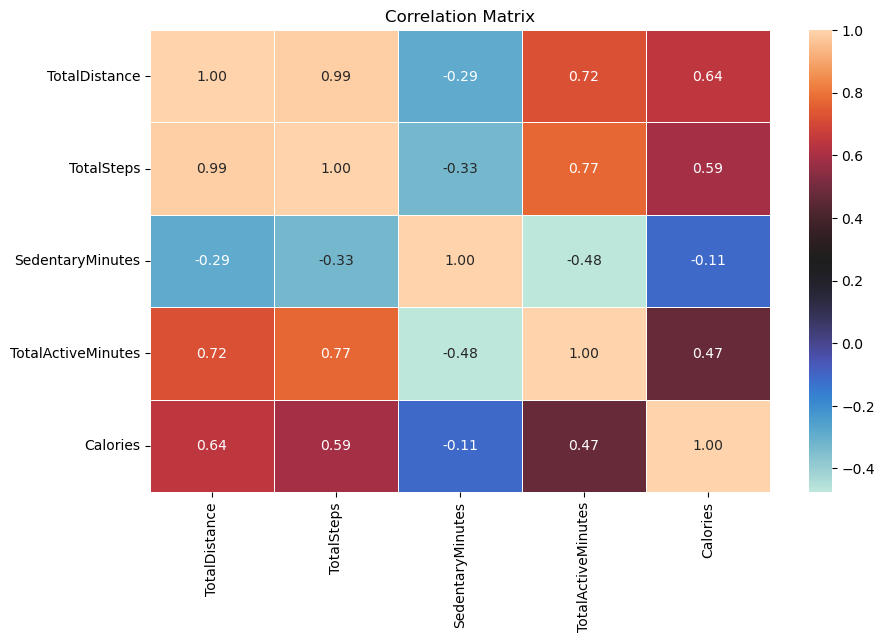

In [36]:
Corr1 = ["TotalDistance", "TotalSteps", 
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(daily_activity[Corr1].corr(), 
            annot = True, 
            fmt = ".2f",
            linewidths=0.5,
           cmap="icefire")

ax.set_title('Correlation Matrix');

Observation 1: **Positive Correlation** with Caloric Expenditure

TotalActiveMinutes: There is a strong positive correlation between TotalActiveMinutes and caloric expenditure. This means that as users engage in more physical activity, their caloric burn increases accordingly.

TotalSteps: There is a positive correlation between TotalSteps and caloric expenditure. As users accumulate more steps throughout the day, their energy expenditure rises.

TotalDistance: Similarly, there is a positive correlation between TotalDistance covered during activities and caloric expenditure. Users who cover greater distances tend to burn more calories.

Observation 2: **Negative Correlation** with Sedentary Behavior

SedentaryMinutes: There is a negative correlation between SedentaryMinutes and caloric expenditure. This implies that as users spend more time in sedentary activities, their caloric burn decreases.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.2. COMPARING TOTAL STEPS AND SEDENTARY MINUTES TO CALORIES</h4>

C:\Users\deeps\anaconda3\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


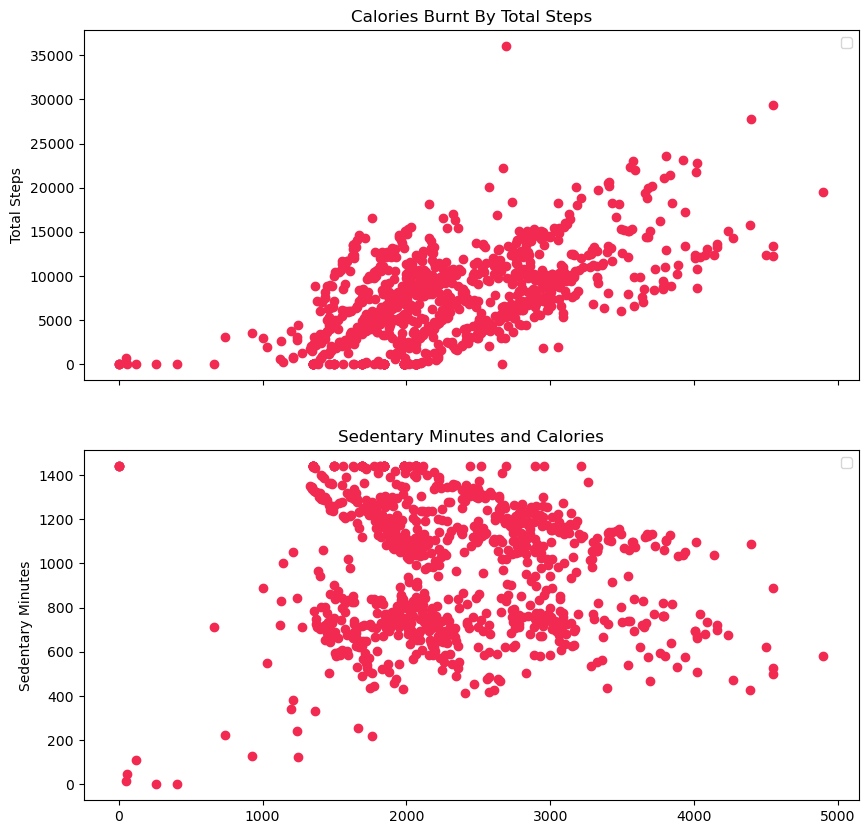

In [37]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=daily_activity["Calories"],
                     y=daily_activity["TotalSteps"],
                     color="#f22a51")
ax0.set(title="Calories Burnt By Total Steps",
       ylabel="Total Steps")

ax0.legend(*scatter.legend_elements(), title=None)

scatter = ax1.scatter(x=daily_activity["Calories"],
                     y=daily_activity["SedentaryMinutes"],
                     color="#f22a51")
ax1.set(title="Sedentary Minutes and Calories",
       ylabel="Sedentary Minutes")

ax1.legend(*scatter.legend_elements(), title=None);

**Scatterplot Analysis**

The scatterplot provides a visual representation of the relationships between TotalSteps, SedentaryMinutes, and CaloricExpenditure:

TotalSteps vs. CaloricExpenditure: The scatterplot indicates a positive correlation between TotalSteps and CaloricExpenditure. As the number of steps taken increases, there is a corresponding increase in caloric burn. This relationship is demonstrated by an upward trend in the scatterplot, suggesting that higher step counts result in greater caloric expenditure.

SedentaryMinutes vs. CaloricExpenditure: The scatterplot reveals a negative correlation between SedentaryMinutes and CaloricExpenditure. As the duration of sedentary behavior increases, there is a decrease in caloric burn. This negative relationship is reflected in a downward trend in the scatterplot, indicating that more sedentary minutes are associated with lower caloric expenditure.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.3. SEDENTARY MINUTES VS TOTAL ACTIVE MINUTES</h4>

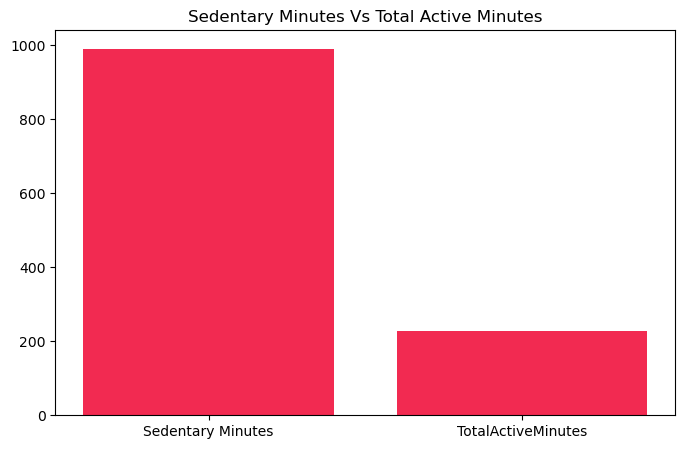

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.8, color = "#f22a51")
plt.show()             

**Disparity Between SedentaryMinutes and TotalActiveMinutes**

Our analysis highlights a substantial gap between the time spent in sedentary activities (SedentaryMinutes) and the time spent in active pursuits (TotalActiveMinutes). This disparity suggests that users spend significantly more time sitting or lying down than engaging in physical activities.

**Implications for Occupation and Lifestyle**

The stark contrast between SedentaryMinutes and TotalActiveMinutes offers insights into the occupation and lifestyle of the user base. It is likely that users belong to the working class, spending long hours behind desks or engaging in occupations that require extended periods of sedentary behavior. This observation aligns with the common scenario of individuals in desk jobs or professions that involve limited physical activity.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.4. TOTAL CALORIES BURNT BY DAY OF THE WEEK</h4>

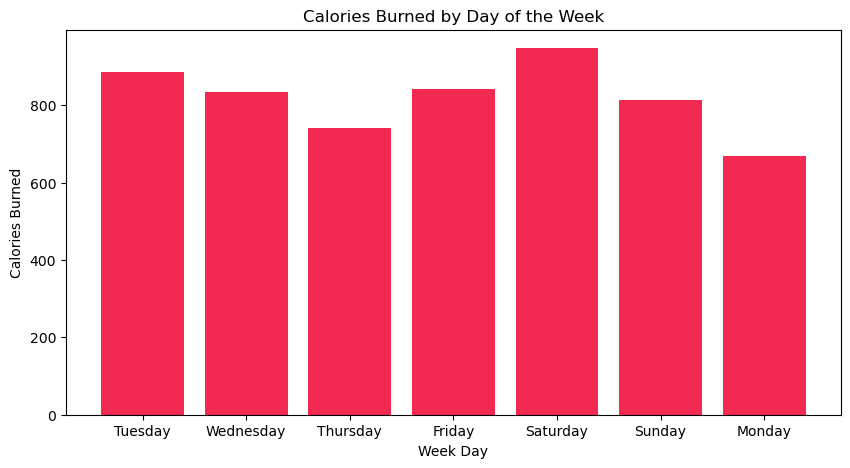

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df.WeekDay, merge_df.Calories, color = "#f22a51")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.show()


**Weekend Effect:**

Saturdays typically provide individuals with more free time and flexibility to engage in physical activities and exercise. Users may take advantage of their weekends to participate in recreational activities or workout routines, leading to higher calorie burn on Saturdays.

**Workload and Sedentary Behavior:**

Mondays often mark the beginning of the workweek, and individuals may experience higher workloads and time constraints. This can result in reduced opportunities for physical activity and increased sedentary behavior, leading to lower calorie burn on Mondays.

**Inference**

Exercise Habits: Users might have established exercise routines that prioritize weekends for dedicated workouts or outdoor activities. This could contribute to the higher calorie burn observed on Saturdays.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.5. TOTAL STEPS BY DAY OF THE WEEK</h4>
Next, I checked to see the relationship between Total Steps taken by Day of the Week.

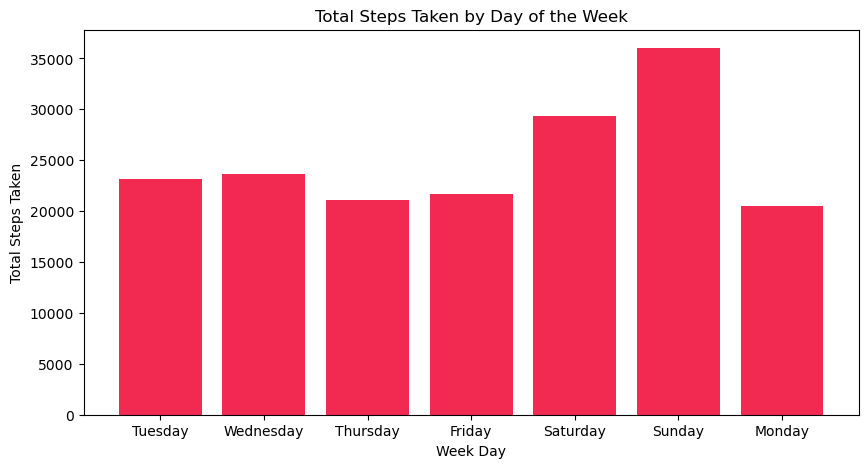

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(daily_activity.WeekDay, daily_activity.TotalSteps, 
        color = "#f22a51")
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.show()

 The fact that Monday recorded the lowest calorie burn aligns with the finding that fewer steps were taken on that day compared to the other days of the week.

Based on this data, it is reasonable to infer that the users, who are most likely working class individuals, may spend more time sitting behind their work desks on Mondays, resulting in lower step counts and reduced physical activity. This behavior is consistent with the patterns commonly observed in office or desk-based jobs, where individuals may have limited opportunities for movement during their workday.

Furthermore, the observation that the most steps were taken on Saturday and Sunday is in line with expectations. Weekends generally provide individuals with more leisure time and fewer work-related obligations, allowing for increased physical activity, outdoor pursuits, or engagement in recreational activities. This finding supports the notion that users are more active on weekends when they have more freedom to prioritize exercise and movement.

Understanding the profile of the users as working class individuals and their activity patterns throughout the week can guide stakeholders in developing targeted interventions.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.6. TOTAL TIME ASLEEP BY DAY OF THE WEEK</h4>

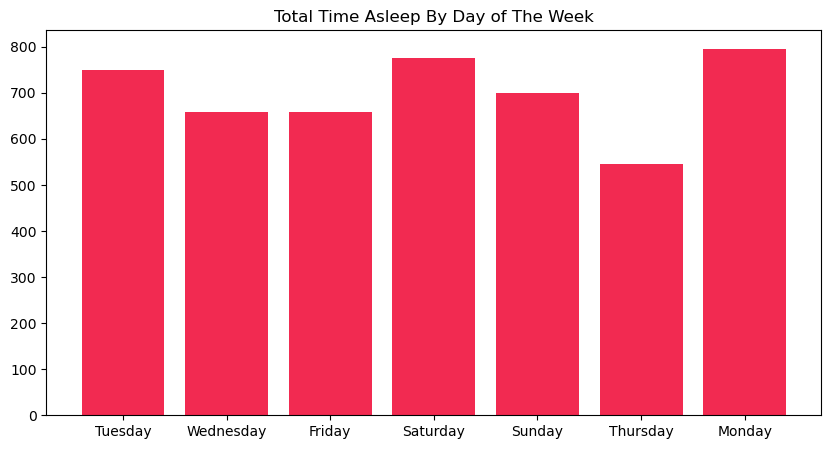

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["WeekDay"]
y = merge_df2["TotalMinutesAsleep"]

plt.title("Total Time Asleep By Day of The Week")
plt.bar(x, y, width = 0.8, color = "#f22a51")
plt.show() 

The information about sleep patterns and its correlation with calorie burn provides interesting insights into the users' behavior and potential factors affecting their sleep and energy expenditure. Let's analyze the observations:

Sleep Duration on Thursday: The data shows that users slept the least on Thursday. While it is not explicitly stated why this is the case, several factors could contribute to shorter sleep duration on Thursdays. It could be related to work-related stress, weekday responsibilities, or other external factors that impact sleep quality and duration.

Sleep Duration on Monday: Contrary to the general expectation of people sleeping longer when exhausted, users slept the most on Mondays. There could be various reasons for this, such as catching up on sleep after a potentially active or sleep-deprived weekend, or the users' personal sleep patterns that lead to longer hours of sleep at the beginning of the week.

Sleep Duration and Caloric Expenditure: The observation that users slept longer on days when they lost more calories (Saturday, Tuesday, and Sunday) suggests a potential correlation between sleep duration and energy expenditure. It is possible that increased physical activity on these days, leading to higher calorie burn, may contribute to users feeling more tired and needing longer hours of sleep to recover.

**Overall, these findings imply that sleep duration is influenced by various factors, including lifestyle, physical activity levels, and individual sleep patterns.**


<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.7. THE MOST AND LEAST ACTIVE HOURS OF THE DAY</h4>

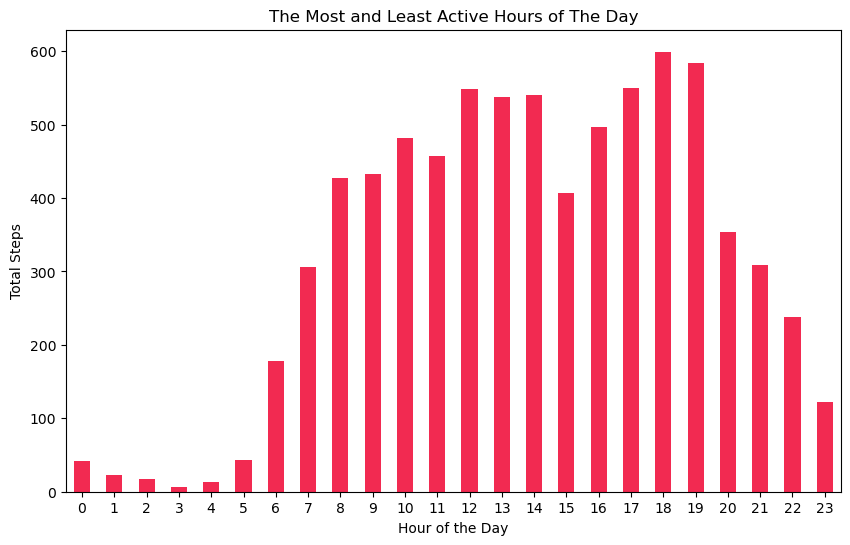

In [42]:
#Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(10, 6))
merge_df.groupby(merge_df['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='#f22a51', title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

The analysis of users' activity patterns throughout the day provides valuable insights into their daily routines and potential opportunities for targeted advertising.

**Busy Hours from 8 a.m. to 7 p.m.**

The data indicates that users' activity levels are highest between 8 a.m. and 7 p.m., suggesting that this period corresponds to their busiest hours. This aligns with typical workday hours for many individuals, where they are engaged in professional responsibilities, commuting, or other tasks.

**Least Active Hours from 8 p.m. to 10 p.m.**

The data shows that users are least active during the evening hours between 8 p.m. and 10 p.m. This period is likely characterized by winding down after a busy day, engaging in leisure activities, spending time with family, or simply relaxing. 

**Based on these findings, targeting users with relevant advertisements during their least active hours, such as in the evening between 8 p.m. and 10 p.m., can potentially increase the visibility and effectiveness of the campaigns.**

## **<span style="color:#f22a51">6. ACT</span>**
<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">6.1. RECOMMENDATION</h4>

1.**Promotion**
Our analysis has provided valuable insights into users' activity patterns, including their least active hours between 8 p.m. and 10 p.m. We recommend scheduling advertising initiatives during these periods to optimize visibility and cost-effectiveness. Platforms such as Google AdWords, with their ad scheduling functions, can effectively target our audience during these less active hours.

2.**Retention**
To improve user retention, we propose the following strategies:

2.1. **Personalized Recommendations and Rewards**

Implement personalized recommendations based on users' activity data and preferences. By leveraging machine learning algorithms, we can offer tailored product suggestions, content, and challenges. This personalized approach will deepen customer engagement and satisfaction. Additionally, consider implementing a rewards program where users can earn points or unlock exclusive benefits for reaching milestones, achieving goals, or referring friends. This will incentivize continued engagement and foster a sense of loyalty.

2.2. **Community Building and Social Engagement**

Create online forums or social media groups dedicated to the Bellabeat community, where users can connect, share their experiences, and support each other's fitness journeys. Encourage user-generated content, such as success stories, tips, and challenges, to create an interactive and vibrant community. Our marketing team's active participation in these platforms, engaging with users and providing valuable insights, will strengthen the ecosystem and foster a strong connection between users and the Bellabeat brand.

2.3. **Gamification Elements**

Introduce gamification elements into the Bellabeat ecosystem to enhance the user experience and drive continued engagement. Develop virtual badges or achievements for reaching specific milestones, completing challenges, or maintaining consistency in activity levels. Consider incorporating friendly competition through leaderboards, where users can compare their progress with friends or the wider Bellabeat community. Gamification will increase motivation, create a sense of accomplishment, and encourage users to continue using our products and services.

By implementing these recommendations, we aim to enhance user engagement, retention, and overall customer satisfaction. These strategies align with the findings from our data analysis and offer actionable steps to drive the success of our marketing and retention efforts.